# Plot MST Measures

Here we plot different **MST** measures from the computed connectivity matrices.

In [2]:
from pprint import pprint

In [3]:
import scipy

In [4]:
import pandas as pd

In [5]:
from pandas.tools.plotting import parallel_coordinates

In [6]:
from pandas import concat

In [7]:
import matplotlib
# Set backend to pgf
matplotlib.use('pgf')
import matplotlib.pyplot as plt
import numpy as np

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.color_cycle'] = ['g', 'b', 'r']
plt.gray()

In [8]:
%matplotlib inline

In [9]:
from pylab import *

In [10]:
from scipy.io import loadmat

In [11]:
import operator

In [12]:
pwd

u'/home/dragos/DTC/MSc/SummerProjectReplay/doc'

In [13]:
randomSeed = 20;

# TODO: Change accordingly
CONNECTIVITY_MEASURE = 'dWPLI'
DATASETS_FOLDER = '/home/dragos/DTC/MSc/SummerProject/processed_data/features/'
DATASETS_FOLDER = DATASETS_FOLDER + CONNECTIVITY_MEASURE + '/mst/datasets/'
nameOfDataFileMat = 'datasetMSTGraphMeasures.mat'
nameOfDataFileCSV = 'datasetMSTGraphMeasures.csv'

### MST Dataset Structure

The order of frequency bands is as follows:

Alfa | Beta | Delta | Gamma | Theta | Class

Each band has **6** columns, where each column corresponds to a graph feature, in the following order:

- no of leaves
- characteristic path length (L)
- global efficiency (GE)
- average eccentricity (avgECC)
- radius
- diameter

In [14]:
# store frequencies of interest order as they appear in the dataset table
FoQ_table_order = dict([('delta', 3), ('theta', 5),
                         ('alpha', 1), ('beta', 2),
                         ('gamma', 4)])

# store plot order (in order of frequency values of each bands)
plot_order = dict([ (1, 'delta'), (2, 'theta'), (3, 'alpha'), 
                   (4, 'beta'), (5, 'gamma') ])

# stores class labels
classLabels = dict([ (1, "CS"), (2, "MCI"), (3, "AD") ])

# stores the order in which the measures are specified in the MST dataset matrix
graphMeasures = dict([('leaf no', 1), ('L', 2), ('diameter', 6)])
graphMeasuresForPlots = dict([('leaf no', 1), ('L', 2), ('diameter', 3)])

#### CAREFUL! I have 6 MST measures instead of 5 classical measures! ###
# Although I'm interested in only leaf no, L and diameter, I need the actual no of measures in the table for indexing!
NO_OF_GRAPH_MEASURES = 6

In [15]:
print NO_OF_GRAPH_MEASURES

6


In [16]:
### The following code snippet is from http://stackoverflow.com/a/22937095 ###

# this is just a helper class to keep things clean
class MyAxis(object):
    def __init__(self,ax,fig):
        # this flag tells me if there is a plot in these axes
        self.empty = False
        self.ax = ax
        self.fig = fig
        self.pos = self.ax.get_position()

    def del_ax(self):
        # delete the axes
        self.empty = True
        self.fig.delaxes(self.ax)

    def swap(self,other):
        # swap the positions of two axes
        #
        # THIS IS THE IMPORTANT BIT!
        #
        new_pos = other.ax.get_position()
        self.ax.set_position(new_pos)
        other.ax.set_position(self.pos)
        self.pos = new_pos

In [17]:
for bandOrderIdx in plot_order.keys():
    print bandOrderIdx

1
2
3
4
5


In [19]:
data_file_path = DATASETS_FOLDER + nameOfDataFileMat
print data_file_path

/home/dragos/DTC/MSc/SummerProjectReplay/processed_data/meta/features/mst/datasets/datasetMSTMeasures.mat


### Plotting of MST Measures

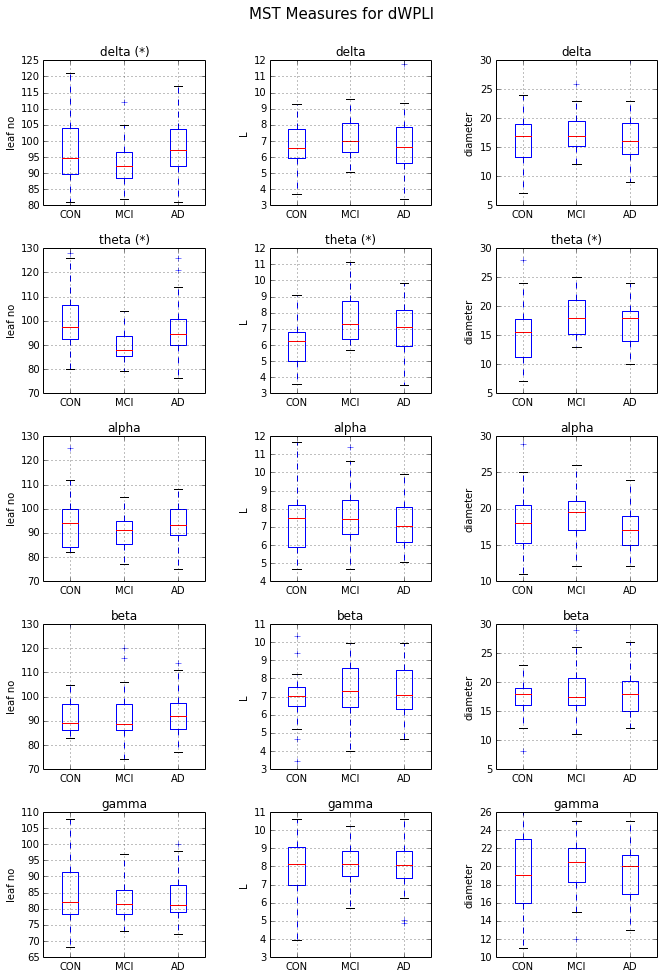

In [22]:
myFig, axes = plt.subplots(nrows=5, ncols=3)
my_axes = [MyAxis(ax,myFig) for ax in axes.ravel()]

#myFig.tight_layout()
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

myFig.subplots_adjust(left, bottom, right, top, wspace, hspace)

for thisAx in my_axes:
    # delete all axes
    thisAx.del_ax()
    #my_axes[6].del_ax()

myFig.set_size_inches(11,15)

myFig.suptitle('MST Measures for dWPLI', fontsize=15)

### Here we generate dictionaries of graph measures, where each graph measure points to a
### dict of bands of interest (alfa, beta..); each band of interest points to a dictionary of classes (MCI, AD..);
### Summary: graph measure --> band --> class

measureToBand = dict()

# signficiant results/plots by indices
significants = [1,4,5,6]

# for each graph measure
for currentMeasure, measureOrder in sorted(graphMeasures.iteritems(), key=operator.itemgetter(1)):
    
    bandToClass = dict()    
    
    # for each frequency band of interest
    for bandOrderIdx in plot_order.keys():
        bandName = plot_order[bandOrderIdx]   
        
        # plot bands as columns and MST measures as rows
        plotIndex = len(graphMeasures)*(bandOrderIdx-1)+graphMeasuresForPlots[currentMeasure]
        bandPlot = myFig.add_subplot(5,3,plotIndex)
        bandPlot.hold(True)
        
        # if significant p value, put (*)
        if plotIndex in significants:
            bandPlot.set_title(bandName + " (*)")
        else:
            bandPlot.set_title(bandName)
            
        #leg = []
        #legp = []  
        bandPlot.set_ylabel(currentMeasure)    
                       
        for currentClass in sorted(classLabels.keys()):                    
            data_file_path = DATASETS_FOLDER + nameOfDataFileMat
            
            #load dataset
            data_dict = loadmat(data_file_path)
            data = data_dict['dataset']
            
            n_samples = data.shape[0]
            features = data[:, :-1]
            targets = data[:, -1]
            
            classIdxs = np.where(targets == currentClass)
            classFeatures = features[classIdxs]
            
            measureIndex = NO_OF_GRAPH_MEASURES*(FoQ_table_order[bandName]-1) + (graphMeasures[currentMeasure]-1)
            
            if currentClass == 1:
                CSdata = classFeatures[:, measureIndex]
            elif currentClass == 2:
                MCIdata = classFeatures[:, measureIndex]
            elif currentClass == 3:
                ADdata = classFeatures[:, measureIndex]
        
        bandPlot.boxplot([CSdata, MCIdata, ADdata])
        plt.xticks([1,2,3],['CON','MCI','AD'])

In [21]:
myFig.savefig('MSTMeasuresdWPLI.pdf')

In [6]:
pwd

u'/home/dragos/DTC/MSc/SummerProjectReplay/doc'